# Machine Learning Titanic

## Carregando Bibliotecas & os Dados

In [1]:
import pandas as pd
import os
import numpy as np
import sys
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [2]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..','Scripts')))
from preprocessing import preprocess_data
from test_feature import engineer_features
from ML import last_FE 

In [3]:


# Define o caminho relativo
file_path = os.path.join('..', 'Data', 'processed_data.csv')  # '..' sobe um nível de diretório

# Carrega os dados
df = pd.read_csv(file_path)
df

,passengerid,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,...,is_male,cabin_group,title,last_name,family_size,fare_group,is_alone,ticket_length,ticket_qtd,sex_pclass_interaction
0,1,0,3,Owen Harris,22.0,1,0,A/5 21171,7.2500,Unk,...,1,Unk,Mr,Braund,2,Low Fare,0,9,1,male_3
1,2,1,1,John Bradley (Florence Briggs Thayer),38.0,1,0,PC 17599,71.2833,C85,...,0,C,Mrs,Cumings,2,High Fare,0,8,1,female_1
2,3,1,3,Laina,26.0,0,0,STON/O2. 3101282,7.9250,Unk,...,0,Unk,Miss,Heikkinen,1,Medium-Low Fare,1,16,1,female_3
3,4,1,1,Jacques Heath (Lily May Peel),35.0,1,0,113803,53.1000,C123,...,0,C,Mrs,Futrelle,2,High Fare,0,6,2,female_1
4,5,0,3,William Henry,35.0,0,0,373450,8.0500,Unk,...,1,Unk,Mr,Allen,1,Medium-Low Fare,1,6,1,male_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Juozas,27.0,0,0,211536,13.0000,Unk,...,1,Unk,Rev,Montvila,1,Medium-Low Fare,1,6,1,male_2
887,888,1,1,Margaret Edith,19.0,0,0,112053,30.0000,B42,...,0,B,Miss,Graham,1,Medium-High Fare,1,6,1,female_1
888,889,0,3,"Catherine Helen ""Carrie""",13.5,1,2,W./C. 6607,23.4500,Unk,...,0,Unk,Miss,Johnston,4,Medium-High Fare,0,10,2,female_3
889,890,1,1,Karl Howell,26.0,0,0,111369,30.0000,C148,...,1,C,Mr,Behr,1,Medium-High Fare,1,6,1,male_1


In [4]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked_c', 'embarked_q', 'embarked_s',
       'age_group', 'is_male', 'cabin_group', 'title', 'last_name',
       'family_size', 'fare_group', 'is_alone', 'ticket_length', 'ticket_qtd',
       'sex_pclass_interaction'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   passengerid             891 non-null    int64  
 1   survived                891 non-null    int64  
 2   pclass                  891 non-null    int64  
 3   name                    891 non-null    object 
 4   age                     891 non-null    float64
 5   sibsp                   891 non-null    int64  
 6   parch                   891 non-null    int64  
 7   ticket                  891 non-null    object 
 8   fare                    891 non-null    float64
 9   cabin                   891 non-null    object 
 10  embarked_c              891 non-null    int64  
 11  embarked_q              891 non-null    int64  
 12  embarked_s              891 non-null    int64  
 13  age_group               891 non-null    object 
 14  is_male                 891 non-null    in

In [6]:
df.isna().sum()

passengerid                0
survived                   0
pclass                     0
name                       0
age                        0
sibsp                      0
parch                      0
ticket                     0
fare                       0
cabin                      0
embarked_c                 0
embarked_q                 0
embarked_s                 0
age_group                  0
is_male                    0
cabin_group                0
title                      0
last_name                  0
family_size                0
fare_group                15
is_alone                   0
ticket_length              0
ticket_qtd                 0
sex_pclass_interaction     0
dtype: int64

In [7]:
df[df['fare_group'].isna()]

,passengerid,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,...,is_male,cabin_group,title,last_name,family_size,fare_group,is_alone,ticket_length,ticket_qtd,sex_pclass_interaction
179,180,0,3,Lionel,36.000000,0,0,LINE,0.0,Unk,...,1,Unk,Mr,Leonard,1,NaN,1,4,4,male_3
263,264,0,1,William,40.000000,0,0,112059,0.0,B94,...,1,B,Mr,Harrison,1,NaN,1,6,1,male_1
271,272,1,3,William Henry,25.000000,0,0,LINE,0.0,Unk,...,1,Unk,Mr,Tornquist,1,NaN,1,4,4,male_3
277,278,0,2,"Francis ""Frank""",33.904119,0,0,239853,0.0,Unk,...,1,Unk,Mr,Parkes,1,NaN,1,6,3,male_2
302,303,0,3,William Cahoone Jr,19.000000,0,0,LINE,0.0,Unk,...,1,Unk,Mr,Johnson,1,NaN,1,4,4,male_3
413,414,0,2,Alfred Fleming,33.904119,0,0,239853,0.0,Unk,...,1,Unk,Mr,Cunningham,1,NaN,1,6,3,male_2
466,467,0,2,William,33.904119,0,0,239853,0.0,Unk,...,1,Unk,Mr,Campbell,1,NaN,1,6,3,male_2
481,482,0,2,"Anthony Wood ""Archie""",33.904119,0,0,239854,0.0,Unk,...,1,Unk,Mr,Frost,1,NaN,1,6,1,male_2
597,598,0,3,Alfred,49.000000,0,0,LINE,0.0,Unk,...,1,Unk,Mr,Johnson,1,NaN,1,4,4,male_3
633,634,0,1,William Henry Marsh,39.000000,0,0,112052,0.0,Unk,...,1,Unk,Mr,Parr,1,NaN,1,6,1,male_1


In [8]:
from ML import last_FE 
df = last_FE(df)
df

,passengerid,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,...,ticket_qtd,sex_pclass_interaction,cabin_number,cabin_number_sex,cabin_number_pclass,cabin_group_sex,cabin_group_pclass,age_pclass_interaction,sex_pclass_interaction2,deck
0,1,0,3,Owen Harris,22.0,1,0,A/5 21171,7.2500,Unk,...,1,1,-1.0,-1.0_1,-1.0_3,Unknown_1,Unknown_3,66.0,3,0
1,2,1,1,John Bradley (Florence Briggs Thayer),38.0,1,0,PC 17599,71.2833,C85,...,1,2,85.0,85.0_0,85.0_1,81-100_0,81-100_1,38.0,0,3
2,3,1,3,Laina,26.0,0,0,STON/O2. 3101282,7.9250,Unk,...,1,3,-1.0,-1.0_0,-1.0_3,Unknown_0,Unknown_3,78.0,0,0
3,4,1,1,Jacques Heath (Lily May Peel),35.0,1,0,113803,53.1000,C123,...,2,2,123.0,123.0_0,123.0_1,100+_0,100+_1,35.0,0,3
4,5,0,3,William Henry,35.0,0,0,373450,8.0500,Unk,...,1,1,-1.0,-1.0_1,-1.0_3,Unknown_1,Unknown_3,105.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Juozas,27.0,0,0,211536,13.0000,Unk,...,1,6,-1.0,-1.0_1,-1.0_2,Unknown_1,Unknown_2,54.0,2,0
887,888,1,1,Margaret Edith,19.0,0,0,112053,30.0000,B42,...,1,2,42.0,42.0_0,42.0_1,41-60_0,41-60_1,19.0,0,2
888,889,0,3,"Catherine Helen ""Carrie""",13.5,1,2,W./C. 6607,23.4500,Unk,...,2,3,-1.0,-1.0_0,-1.0_3,Unknown_0,Unknown_3,40.5,0,0
889,890,1,1,Karl Howell,26.0,0,0,111369,30.0000,C148,...,1,4,148.0,148.0_1,148.0_1,100+_1,100+_1,26.0,1,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   passengerid              891 non-null    int64   
 1   survived                 891 non-null    int64   
 2   pclass                   891 non-null    int64   
 3   name                     891 non-null    object  
 4   age                      891 non-null    float64 
 5   sibsp                    891 non-null    int64   
 6   parch                    891 non-null    int64   
 7   ticket                   891 non-null    object  
 8   fare                     891 non-null    float64 
 9   cabin                    891 non-null    object  
 10  embarked_c               891 non-null    int64   
 11  embarked_q               891 non-null    int64   
 12  embarked_s               891 non-null    int64   
 13  age_group                891 non-null    int64   
 14  is_male   

In [10]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked_c', 'embarked_q', 'embarked_s',
       'age_group', 'is_male', 'cabin_group', 'title', 'last_name',
       'family_size', 'fare_group', 'is_alone', 'ticket_length', 'ticket_qtd',
       'sex_pclass_interaction', 'cabin_number', 'cabin_number_sex',
       'cabin_number_pclass', 'cabin_group_sex', 'cabin_group_pclass',
       'age_pclass_interaction', 'sex_pclass_interaction2', 'deck'],
      dtype='object')

In [11]:
# Função para mapear as categorias de uma coluna automaticamente
def automatic_mapping(df, columns):
    for col in columns:
        # Divida os valores pelo "_" e pegue apenas a primeira parte (a categoria antes do "_")
        df[col] = df[col].apply(lambda x: x.split('_')[0])
        
        # Agora converte essas categorias únicas para números usando pd.Categorical
        df[col] = pd.Categorical(df[col]).codes
    return df

# Defina as colunas que deseja mapear
columns_to_map = ['cabin_group_pclass', 'cabin_group_sex', 'cabin_number_pclass', 'cabin_number_sex','cabin_group']

# Aplique o mapeamento automático
df = automatic_mapping(df, columns_to_map)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passengerid              891 non-null    int64  
 1   survived                 891 non-null    int64  
 2   pclass                   891 non-null    int64  
 3   name                     891 non-null    object 
 4   age                      891 non-null    float64
 5   sibsp                    891 non-null    int64  
 6   parch                    891 non-null    int64  
 7   ticket                   891 non-null    object 
 8   fare                     891 non-null    float64
 9   cabin                    891 non-null    object 
 10  embarked_c               891 non-null    int64  
 11  embarked_q               891 non-null    int64  
 12  embarked_s               891 non-null    int64  
 13  age_group                891 non-null    int64  
 14  is_male                  8

In [12]:
#usar so colunas de grupo e nao a original caso tenha grupo
features = ['pclass', 'age', 'sibsp', 'parch',
        'embarked_c', 'embarked_q', 'embarked_s',
       'age_group', 'is_male', 'cabin_group', 'title',
       'family_size', 'fare_group', 'is_alone', 'ticket_length', 'ticket_qtd',
       'sex_pclass_interaction','age_pclass_interaction',
       'sex_pclass_interaction2', 'deck','cabin_number', 'cabin_number_sex',
       'cabin_number_pclass', 'cabin_group_sex', 'cabin_group_pclass']
target = 'survived'

X = df[features]
y = df[target]

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pclass                   891 non-null    int64  
 1   age                      891 non-null    float64
 2   sibsp                    891 non-null    int64  
 3   parch                    891 non-null    int64  
 4   embarked_c               891 non-null    int64  
 5   embarked_q               891 non-null    int64  
 6   embarked_s               891 non-null    int64  
 7   age_group                891 non-null    int64  
 8   is_male                  891 non-null    int64  
 9   cabin_group              891 non-null    int8   
 10  title                    891 non-null    int64  
 11  family_size              891 non-null    int64  
 12  fare_group               891 non-null    float64
 13  is_alone                 891 non-null    int64  
 14  ticket_length            8

In [14]:
# Garantir que as variáveis de interação estão no formato numérico
#X['sex_pclass_interaction'] = X['sex_pclass_interaction'].astype(int)
#X['sex_pclass_interaction2'] = X['sex_pclass_interaction2'].astype(int)
#X['age_pclass_interaction'] = X['age_pclass_interaction'].astype(int)


Acurácia do Random Forest: 0.8212


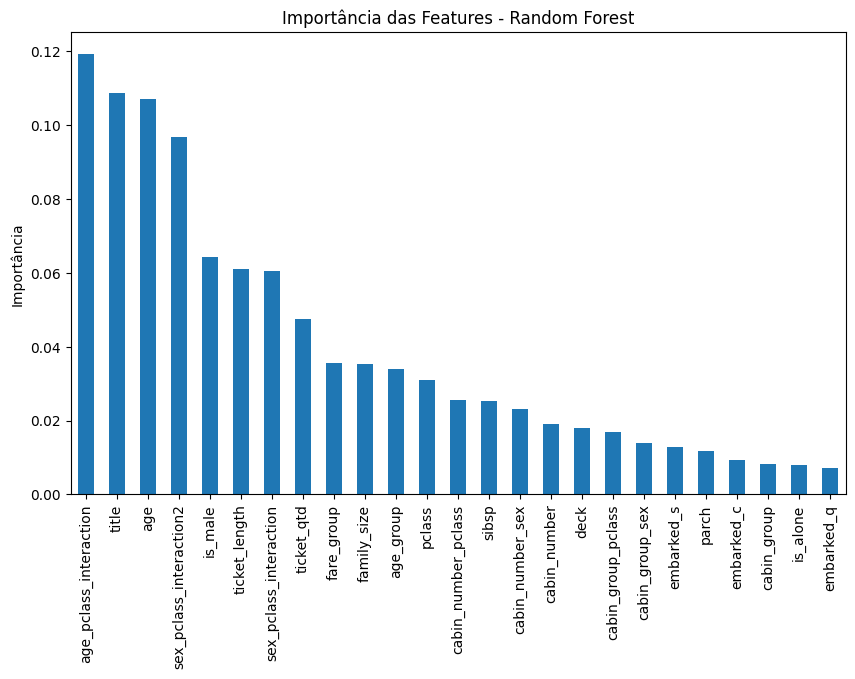

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Treinando o modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prevendo com o conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Avaliando o desempenho do modelo
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do Random Forest: {rf_accuracy:.4f}")

# Importância das Features no Random Forest
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
rf_feature_importance = rf_feature_importance.sort_values(ascending=False)

# Plotando a importância das features
plt.figure(figsize=(10,6))
rf_feature_importance.plot(kind='bar')
plt.title('Importância das Features - Random Forest')
plt.ylabel('Importância')
plt.show()


Acurácia do XGBoost: 0.8045


<Figure size 1000x600 with 0 Axes>

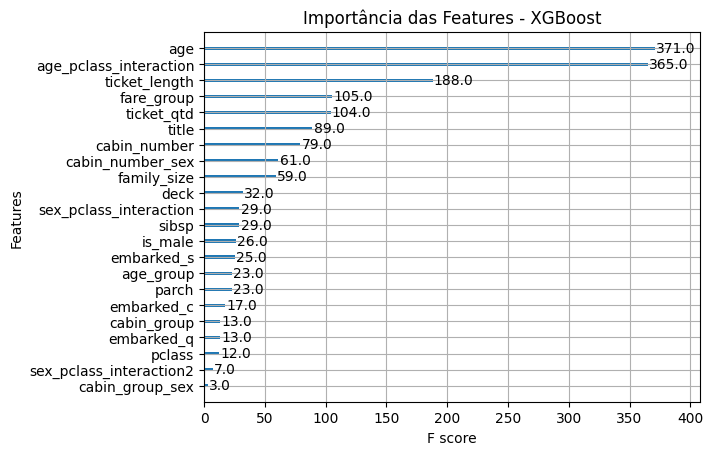

In [16]:
import xgboost as xgb
from xgboost import plot_importance

# Treinando o modelo de XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Prevendo com o conjunto de teste
y_pred_xgb = xgb_model.predict(X_test)

# Avaliando o desempenho do modelo
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Acurácia do XGBoost: {xgb_accuracy:.4f}")

# Importância das Features no XGBoost
plt.figure(figsize=(10,6))
plot_importance(xgb_model, importance_type='weight')
plt.title('Importância das Features - XGBoost')
plt.show()


In [17]:
# Selecionando apenas as top N features mais importantes
top_features = rf_feature_importance.index[:13]  # Substitua N pelo número desejado de features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Re-treinar os modelos com as features selecionadas
rf_model.fit(X_train_top, y_train)
y_pred_rf_top = rf_model.predict(X_test_top)
print(f"Acurácia do Random Forest com top N features: {accuracy_score(y_test, y_pred_rf_top):.4f}")

xgb_model.fit(X_train_top, y_train)
y_pred_xgb_top = xgb_model.predict(X_test_top)
print(f"Acurácia do XGBoost com top N features: {accuracy_score(y_test, y_pred_xgb_top):.4f}")


Acurácia do Random Forest com top N features: 0.8380
Acurácia do XGBoost com top N features: 0.8045


In [18]:
top_features

Index(['age_pclass_interaction', 'title', 'age', 'sex_pclass_interaction2',
       'is_male', 'ticket_length', 'sex_pclass_interaction', 'ticket_qtd',
       'fare_group', 'family_size', 'age_group', 'pclass',
       'cabin_number_pclass'],
      dtype='object')

In [19]:
from sklearn.model_selection import GridSearchCV

# Definindo os parâmetros que você quer testar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Criando o modelo
rf = RandomForestClassifier(random_state=42)

# Aplicando Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_top, y_train)

# Melhores parâmetros
print(grid_search.best_params_)


{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [20]:
# Treinando o modelo de Random Forest
rf_model = RandomForestClassifier(max_depth = 20, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100,random_state=42)
rf_model.fit(X_train_top, y_train)

# Prevendo com o conjunto de teste
y_pred_rf = rf_model.predict(X_test_top)

# Avaliando o desempenho do modelo
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do Random Forest: {rf_accuracy:.4f}")

Acurácia do Random Forest: 0.8380


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



# Inicializando os modelos base
rf_model = RandomForestClassifier(max_depth = 20, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100,random_state=42)
lgb_model = LGBMClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
cat_model = CatBoostClassifier(silent=True, random_state=42)

# Criando o modelo de Stacking
estimators = [
    ('rf', rf_model),
    ('lgb', lgb_model),
    ('xgb', xgb_model),
    ('cat', cat_model)
]

stacking_model_o = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Treinando o modelo de Stacking
stacking_model_o.fit(X_train_top, y_train)

# Fazendo previsões
stacking_pred = stacking_model_o.predict(X_test_top)

# Calculando a acurácia
stacking_accuracy = accuracy_score(y_test, stacking_pred)

# Exibindo o resultado
print(f"Acurácia do modelo de Stacking: {stacking_accuracy:.4f}")


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 294
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [55]:
# Importando bibliotecas necessárias
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Inicializando os modelos base
rf_model = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)
lgb_model = LGBMClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
cat_model = CatBoostClassifier(silent=True, random_state=42)

# Criando o modelo de Stacking com MLPClassifier como meta-modelo
estimators = [
    ('rf', rf_model),
    ('lgb', lgb_model),
    ('xgb', xgb_model),
    ('cat', cat_model)
]

# MLPClassifier como meta-modelo
mlp_model = MLPClassifier(hidden_layer_sizes=(1000, 500), max_iter=10000, random_state=42,learning_rate_init=0.01, learning_rate='invscaling', power_t=0.9)

stacking_model1 = StackingClassifier(estimators=estimators, final_estimator=mlp_model)

# Realizando validação cruzada para avaliar o modelo de Stacking
cv_scores = cross_val_score(stacking_model1, X_train_top, y_train, cv=5)  # Usando 5 folds

# Treinando o modelo de Stacking
stacking_model1.fit(X_train_top, y_train)

# Fazendo previsões
stacking_pred = stacking_model1.predict(X_test_top)

# Calculando a acurácia
stacking_accuracy = accuracy_score(y_test, stacking_pred)

# Exibindo os resultados
print(f"Acurácia do modelo de Stacking: {stacking_accuracy:.4f}")
print(f"Acurácia média na validação cruzada: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")


[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 266
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

# Criando o arquivo de submissao

In [23]:
# Adiciona o diretório 'Scripts' ao sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..','Scripts')))
from preprocessing import preprocess_data
from test_feature import engineer_features
from ML import last_FE 


# Define o caminho relativo
file_path = os.path.join('..', 'Data', 'test.csv')  # '..' sobe um nível de diretório

# Carrega os dados
df_test = pd.read_csv(file_path)

df_test = preprocess_data(df_test)
df_test = engineer_features(df_test)
df_test = last_FE(df_test)
df_test

,passengerid,pclass,name,age,sibsp,parch,ticket,fare,cabin,embarked_c,...,ticket_qtd,sex_pclass_interaction,cabin_number,cabin_number_sex,cabin_number_pclass,cabin_group_sex,cabin_group_pclass,age_pclass_interaction,sex_pclass_interaction2,deck
0,892,3,James,34.500,0,0,330911,7.8292,Unk,0,...,1,1,-1.0,-1.0_1,-1.0_3,Unknown_1,Unknown_3,103.500,3,0
1,893,3,James (Ellen Needs),47.000,1,0,363272,7.0000,Unk,0,...,1,3,-1.0,-1.0_0,-1.0_3,Unknown_0,Unknown_3,141.000,0,0
2,894,2,Thomas Francis,62.000,0,0,240276,9.6875,Unk,0,...,1,6,-1.0,-1.0_1,-1.0_2,Unknown_1,Unknown_2,124.000,2,0
3,895,3,Albert,27.000,0,0,315154,8.6625,Unk,0,...,1,1,-1.0,-1.0_1,-1.0_3,Unknown_1,Unknown_3,81.000,3,0
4,896,3,Alexander (Helga E Lindqvist),22.000,1,1,3101298,12.2875,Unk,0,...,1,3,-1.0,-1.0_0,-1.0_3,Unknown_0,Unknown_3,66.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Woolf,25.125,0,0,A.5. 3236,8.0500,Unk,0,...,1,1,-1.0,-1.0_1,-1.0_3,Unknown_1,Unknown_3,75.375,3,0
414,1306,1,Fermina,39.000,0,0,PC 17758,108.9000,C105,1,...,1,2,105.0,105.0_0,105.0_1,100+_0,100+_1,39.000,0,3
415,1307,3,Simon Sivertsen,38.500,0,0,SOTON/O.Q. 3101262,7.2500,Unk,0,...,1,1,-1.0,-1.0_1,-1.0_3,Unknown_1,Unknown_3,115.500,3,0
416,1308,3,Frederick,25.125,0,0,359309,8.0500,Unk,0,...,1,1,-1.0,-1.0_1,-1.0_3,Unknown_1,Unknown_3,75.375,3,0


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [25]:
# Função para mapear as categorias de uma coluna automaticamente
def automatic_mapping(df, columns):
    for col in columns:
        # Divida os valores pelo "_" e pegue apenas a primeira parte (a categoria antes do "_")
        df[col] = df[col].apply(lambda x: x.split('_')[0])
        
        # Agora converte essas categorias únicas para números usando pd.Categorical
        df[col] = pd.Categorical(df[col]).codes
    return df

# Defina as colunas que deseja mapear
columns_to_map = ['cabin_group_pclass', 'cabin_group_sex', 'cabin_number_pclass', 'cabin_number_sex','cabin_group']

# Aplique o mapeamento automático
df_test = automatic_mapping(df_test, columns_to_map)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passengerid              418 non-null    int64  
 1   pclass                   418 non-null    int64  
 2   name                     418 non-null    object 
 3   age                      415 non-null    float64
 4   sibsp                    418 non-null    int64  
 5   parch                    418 non-null    int64  
 6   ticket                   418 non-null    object 
 7   fare                     417 non-null    float64
 8   cabin                    418 non-null    object 
 9   embarked_c               418 non-null    int32  
 10  embarked_q               418 non-null    int32  
 11  embarked_s               418 non-null    int32  
 12  age_group                418 non-null    float64
 13  is_male                  418 non-null    int32  
 14  cabin_group              4

In [26]:
df_test.isna().sum()

passengerid                0
pclass                     0
name                       0
age                        3
sibsp                      0
parch                      0
ticket                     0
fare                       1
cabin                      0
embarked_c                 0
embarked_q                 0
embarked_s                 0
age_group                  0
is_male                    0
cabin_group                0
title                      0
last_name                  0
family_size                0
fare_group                 0
is_alone                   0
ticket_length              0
ticket_qtd                 0
sex_pclass_interaction     0
cabin_number               0
cabin_number_sex           0
cabin_number_pclass        0
cabin_group_sex            0
cabin_group_pclass         0
age_pclass_interaction     3
sex_pclass_interaction2    0
deck                       0
dtype: int64

In [27]:
df_test['age_pclass_interaction'] = df_test['age_pclass_interaction'].fillna(df_test['age_pclass_interaction'].mean())
df_test['age'] = df_test['age'].fillna(df_test['age'].mean())


In [28]:
df_test['cabin_number_pclass']

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    3
415    0
416    0
417    0
Name: cabin_number_pclass, Length: 418, dtype: int8

In [34]:
# As mesmas features que foram usadas para treinar o modelo
features = ['age_pclass_interaction', 'title', 'age', 'sex_pclass_interaction2',
            'is_male', 'ticket_length', 'sex_pclass_interaction', 'ticket_qtd',
            'fare_group', 'family_size', 'age_group', 'pclass',
            'cabin_number_pclass']

# Dividindo os dados de treino (df) para ajuste do modelo Stacking
# Supondo que df é o DataFrame com os dados de treinamento
# Substitua por seu próprio DataFrame conforme necessário
y = df['survived']
X = df[features]

# Dividir os dados de treino e ajustar o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializando os modelos base
rf_model = RandomForestClassifier(random_state=42)
lgb_model = LGBMClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
cat_model = CatBoostClassifier(silent=True, random_state=42)

# Criando o modelo de Stacking
estimators = [
    ('rf', rf_model),
    ('lgb', lgb_model),
    ('xgb', xgb_model),
    ('cat', cat_model)
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Treinando o modelo de Stacking
stacking_model.fit(X_train, y_train)

# Previsões no conjunto de teste (df_test)
X_test_final = df_test[features]
test_predictions = stacking_model.predict(X_test_final)

# Criando o DataFrame para submissão
submission = pd.DataFrame({
    'PassengerId': df_test['passengerid'],  # Certifique-se de que a coluna 'PassengerId' existe em df_test
    'Survived': test_predictions
})

# Salvando o DataFrame em um arquivo CSV
submission.to_csv('C:\\Users\\Guilherme\\OneDrive\\Área de Trabalho\\submissionnova.csv', index=False)

print("Arquivo de submissão criado com sucesso!")


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 294
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [51]:

X_test_final = df_test[features]
test_predictions = stacking_model1.predict(X_test_final)

# Criando o DataFrame para submissão
submission = pd.DataFrame({
    'PassengerId': df_test['passengerid'],  # Certifique-se de que a coluna 'PassengerId' existe em df_test
    'Survived': test_predictions
})

# Salvando o DataFrame em um arquivo CSV
submission.to_csv('C:\\Users\\Guilherme\\OneDrive\\Área de Trabalho\\submission_model2.csv', index=False)

print("Arquivo de submissão criado com sucesso!")

Arquivo de submissão criado com sucesso!
